<a href="https://colab.research.google.com/github/VanesaTaipe/C8286/blob/main/Entrenamiento_curso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instalación de bibliotecas necesarias:**

In [1]:
!pip install transformers==4.30.2 accelerate==0.21.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux

In [2]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=b51797a8bb1c3c70364fffa0d9a7e3c4430bf851c01087b120a282b17c8af1e9
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [3]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

In [4]:
!pip show transformers
!pip show accelerate

Name: transformers
Version: 4.30.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 
Name: accelerate
Version: 0.21.0
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: sylvain@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, packaging, psutil, pyyaml, torch
Required-by: 


Importación de bibliotecas

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams
from langdetect import detect
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count
import joblib
from transformers import XLMRobertaForSequenceClassification, Trainer, TrainingArguments
from transformers import XLMRobertaTokenizer
from datasets import Dataset
import torch
import time
from scipy.sparse import issparse
from sklearn.preprocessing import LabelEncoder
# Configuración inicial
nltk.download(['punkt', 'stopwords'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Cargar la data

In [6]:
data=pd.read_csv("/content/Data_preprocesados_actual.csv")

In [7]:
data

,user_id,sentiment,text_limpio
0,1515220311469621248,Positivo,Daniel Andrews won three elections and serv...
1,1771902488074944512,Positivo,"TODAS Y TODOS LOS REVOLUCIONARIOS, con la Ve..."
2,1075476235449450499,Positivo,AHORA | Contundente triunfo de Daniel Reyes ...
3,1382805156,Positivo,"La era Scaloni:\n\n70 partidos. 49 victorias,..."
4,1270842720731488265,Positivo,ANITTA NO FANTÁSTICO ez
...,...,...,...
1196,924395315389661186,Neutro,coisa mais normal do mundo é mulher bonita co...
1197,469296197,Neutro,We can’t just sit back and stay silent when t...
1198,881021172,Neutro,Ya tenemos citas para el martes muchas gracia...
1199,724241069173542914,Neutro,Yo confío 100% en nosotros. Estoy convencida ...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      1201 non-null   int64 
 1   sentiment    1201 non-null   object
 2   text_limpio  1201 non-null   object
dtypes: int64(1), object(2)
memory usage: 28.3+ KB


Preparar la data

In [9]:
X = data['text_limpio']
y = data['sentiment']

Codificar etiquetas

In [10]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [11]:
print(label_encoder.classes_)

['Negativo' 'Neutro' 'Positivo']


In [12]:
for i, clase in enumerate(label_encoder.classes_):
    print(f"{clase}: {i}")

Negativo: 0
Neutro: 1
Positivo: 2


Realizamos transformar las etiquetas de sentimiento esta en texto a números.

Negativo: 0

Neutro: 1

Positivo: 2


A continuación, usas la función train_test_split de scikit-learn para dividir los datos en conjuntos de entrenamiento y prueba.

Dividir datos

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


Preprocesamiento

Detección del idioma del texto.

Tokenización:
La tokenización implica dividir el texto en palabras individuales o tokens. Este paso es crucial para un análisis posterior porque permite trabajar con palabras individuales, lo que facilita el análisis de sentimientos a un nivel granular.

Eliminación de stopwords y tokens no alfabéticos:
Las palabras vacías son palabras comunes como "el", "y", "en", que aparecen con frecuencia en el idioma pero que no suelen transmitir mucha información sobre sentimientos. Eliminar las palabras vacías puede reducir el ruido en el análisis y ayudar a centrarse en las palabras de contenido con mayor importancia para los sentimientos.

Generación de n-grama:
Concepto: Un n-grama es una secuencia contigua de n elementos (palabras en este caso) de un texto dado. Importancia: Los n-gramas capturan frases y combinaciones de palabras que pueden ser importantes para el análisis de sentimientos. Ejemplo: Para la frase "El gato duerme", los bi-gramas (n=2) serían ["El gato", "gato duerme"].

Combinación de tokens originales y n-gramas en una cadena de texto.

In [14]:
def get_stopwords():
    languages = ['english', 'spanish', 'portuguese']
    return {lang: set(stopwords.words(lang)) for lang in languages}

STOP_WORDS = get_stopwords()


def preprocess_text_with_ngrams(text, n=2):
    try:
        lang = detect(text)
        if lang not in ['en', 'es', 'pt']:
            lang = 'en'
    except:
        lang = 'en'

    lang_map = {'en': 'english', 'es': 'spanish', 'pt': 'portuguese'}
    nltk_lang = lang_map[lang]

    tokens = word_tokenize(text.lower(), language=nltk_lang)
    tokens = [token for token in tokens if token.isalpha() and token not in STOP_WORDS[nltk_lang]]
    n_grams = list(ngrams(tokens, n))
    n_gram_strings = ['_'.join(gram) for gram in n_grams]
    all_features = tokens + n_gram_strings

    return ' '.join(all_features)

def preprocess_parallel(texts, n_processes=None):
    with Pool(processes=n_processes) as pool:
        return pool.map(preprocess_text_with_ngrams, texts)

Además, agregar preprocesamiento en paralelo tanto para `X_train` Y `X_test`.

In [15]:
start_time = time.time()
X_train_preprocessed = preprocess_parallel(X_train)
X_test_preprocessed = preprocess_parallel(X_test)
print(f"Preprocesamiento completado en {time.time() - start_time:.2f} segundos")


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Preprocesamiento completado en 23.71 segundos


#**Modelo BERT**
Modelo pre-entrenado:

BERT es un modelo de lenguaje avanzado, pre-entrenado en grandes cantidades de texto.
XLM-RoBERTa es una variante multilingüe, ideal para trabajar con inglés, español y portugués.


Ventajas clave:

Comprensión contextual: Capta el significado basado en el contexto completo.
Bidireccionalidad: Procesa el texto en ambas direcciones para mejor entendimiento.
Transfer Learning: Aprovecha el conocimiento pre-entrenado para la tarea específica.


Proceso en el código:

Carga del modelo pre-entrenado XLM-RoBERTa.
Tokenización de los datos de entrada.
Fine-tuning del modelo para análisis de sentimientos.


Beneficios para análisis de sentimientos:

Maneja relaciones complejas en el texto (negaciones, sarcasmo).
Adapta representaciones de palabras según el contexto.
Funciona bien con textos de longitud variable.


Resultado esperado:

Un clasificador de sentimientos robusto y eficaz.
Capaz de manejar matices lingüísticos en múltiples idiomas.


In [16]:
def train_bert_model(X_train, y_train, X_test, y_test):
    # Definir el nombre del modelo pre-entrenado a utilizar
    model_name = "xlm-roberta-base"

    # Cargar el modelo XLM-RoBERTa pre-entrenado y configurarlo para clasificación
    model = XLMRobertaForSequenceClassification.from_pretrained(model_name, num_labels=len(set(y_train)))

    # Cargar el tokenizador correspondiente al modelo
    tokenizer = XLMRobertaTokenizer.from_pretrained(model_name)

    # Función de tokenización optimizada
    def tokenize_function(examples):
        return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512, return_tensors="pt")

    # Crear datasets y tokenizar en lotes
    train_dataset = Dataset.from_dict({"text": X_train, "labels": y_train})
    test_dataset = Dataset.from_dict({"text": X_test, "labels": y_test})

    train_dataset = train_dataset.map(tokenize_function, batched=True, batch_size=1000)
    test_dataset = test_dataset.map(tokenize_function, batched=True, batch_size=1000)

    # Configurar los argumentos de entrenamiento
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=3,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        warmup_steps=300,
        weight_decay=1,
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy="steps"
    )

    # Crear el objeto Trainer que manejará el entrenamiento
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset
    )

    # Entrenar el modelo
    trainer.train()

    # Devolver el trainer y el dataset de prueba tokenizado
    return trainer, test_dataset

In [28]:
start_time = time.time()
bert_trainer, tokenized_test = train_bert_model(X_train_preprocessed, y_train, X_test_preprocessed, y_test)
print(f"Entrenamiento de BERT completado en {time.time() - start_time:.2f} segundos")


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/241 [00:00<?, ? examples/s]

Step,Training Loss,Validation Loss
10,1.096100,1.101819
20,1.091600,1.098688
30,1.078000,1.095159
40,1.105100,1.094792
50,1.068300,1.093044
60,1.051000,1.057408
70,1.036600,1.075634
80,1.091500,1.057365
90,1.063900,1.074686
100,1.057500,1.049075


Entrenamiento de BERT completado en 549.80 segundos


**Predicción:**
El modelo BERT entrenado para hacer predicciones sobre los datos de prueba.
Genera puntuaciones para cada clase (positivo, negativo, neutral) por cada texto.

Convierte las puntuaciones en predicciones de clase.
Selecciona la clase con la puntuación más alta para cada texto.
Resultado: lista de predicciones, una por cada texto de prueba.


In [29]:
start_time = time.time()
bert_predictions = bert_trainer.predict(tokenized_test)
bert_preds = np.argmax(bert_predictions.predictions, axis=-1)
print(f"Predicciones de BERT completadas en {time.time() - start_time:.2f} segundos")


Predicciones de BERT completadas en 7.48 segundos


#**Modelo Naive Bayes**
Entrenar y predecir con Naive Bayes:
Eficiencia: Rápido de entrenar y predecir, ideal para grandes conjuntos de datos.

Baseline: Proporciona un punto de referencia para comparar con BERT.

Buen rendimiento en texto: Eficaz en clasificación de texto y sentimientos.

Simplicidad: Fácil de implementar y entender.
Robustez: Funciona bien incluso con datos limitados y tiene menor riesgo de sobreajuste.

Complementariedad: Ofrece una perspectiva diferente a BERT, enriqueciendo el análisis.

In [30]:
def train_model(params, X_train, y_train):
    print(f"Iniciando entrenamiento con parámetros: {params}")
    model = MultinomialNB(**params)
    model.fit(X_train, y_train)
    print(f"Completado entrenamiento con parámetros: {params}")
    return params, model

def parallel_train_models(param_list, X_train, y_train):
    num_processes = min(len(param_list), cpu_count())
    with Pool(processes=num_processes) as pool:
        results = pool.starmap(train_model, [(params, X_train, y_train) for params in param_list])
    return results

def predict_chunk(args):
    model, X_chunk = args
    return model.predict(X_chunk)

def parallel_predict(model, X, n_processes=None):
    n_processes = n_processes or cpu_count()

    if issparse(X):
        n_samples = X.shape[0]
        chunk_size = n_samples // n_processes
        chunks = [X[i:i+chunk_size] for i in range(0, n_samples, chunk_size)]
    else:
        chunk_size = len(X) // n_processes
        chunks = [X[i:i+chunk_size] for i in range(0, len(X), chunk_size)]

    with Pool(processes=n_processes) as pool:
        results = pool.map(predict_chunk, [(model, chunk) for chunk in chunks])

    return np.concatenate(results)

In [31]:
# Vectorización para Naive Bayes
start_time = time.time()
vectorizer = CountVectorizer(ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train_preprocessed)
X_test_vec = vectorizer.transform(X_test_preprocessed)
print(f"Vectorización completada en {time.time() - start_time:.2f} segundos")

Vectorización completada en 0.18 segundos


In [32]:
# Entrenamiento de modelos Naive Bayes en paralelo
print("Entrenando modelos Naive Bayes...")
start_time = time.time()
param_list = [{'alpha': 0.1}, {'alpha': 1.0}]  # Reducido a 2 combinaciones
trained_models = parallel_train_models(param_list, X_train_vec, y_train)
print(f"Entrenamiento de Naive Bayes completado en {time.time() - start_time:.2f} segundos")

Entrenando modelos Naive Bayes...


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Iniciando entrenamiento con parámetros: {'alpha': 0.1}
Iniciando entrenamiento con parámetros: {'alpha': 1.0}Completado entrenamiento con parámetros: {'alpha': 0.1}

Completado entrenamiento con parámetros: {'alpha': 1.0}
Entrenamiento de Naive Bayes completado en 0.28 segundos


In [33]:
# Seleccionar el mejor modelo Naive Bayes (por simplicidad, tomamos el primero)
best_nb_model = trained_models[0][1]

# Predicción en paralelo para Naive Bayes
print("Realizando predicciones con Naive Bayes...")
start_time = time.time()
nb_predictions = parallel_predict(best_nb_model, X_test_vec)
print(f"Predicciones de Naive Bayes completadas en {time.time() - start_time:.2f} segundos")


Realizando predicciones con Naive Bayes...
Predicciones de Naive Bayes completadas en 0.19 segundos


Guardar para el sprint3.

In [34]:
print("Guardando modelos...")
joblib.dump(best_nb_model, 'nb_model.joblib')
joblib.dump(vectorizer, 'vectorizer.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')
torch.save(bert_trainer.model.state_dict(), 'bert_model.pth')

Guardando modelos...


**Evaluacion y visualizacion**

In [24]:
def plot_metrics(y_true, bert_preds, nb_preds):
    # Etiquetas de los modelos y métricas
    models = ['BERT', 'Naive Bayes']
    metrics = ['Precision', 'Recall', 'F1-score']

    # Calcular métricas de precisión, recall y F1 para BERT y Naive Bayes
    bert_metrics = precision_recall_fscore_support(y_true, bert_preds, average='weighted')[:-1]
    nb_metrics = precision_recall_fscore_support(y_true, nb_preds, average='weighted')[:-1]

    # Configurar el gráfico
    x = np.arange(len(metrics))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 6))

    # Graficar las barras de métricas para BERT y Naive Bayes
    ax.bar(x - width/2, bert_metrics, width, label='BERT')
    ax.bar(x + width/2, nb_metrics, width, label='Naive Bayes')

    # Configurar etiquetas y título del gráfico
    ax.set_ylabel('Scores')
    ax.set_title('Comparación de métricas entre BERT y Naive Bayes')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    # Ajustar el diseño y mostrar el gráfico
    plt.tight_layout()
    plt.show()

def print_classification_reports(y_test, bert_preds, nb_preds):
    # Imprimir el reporte de clasificación para BERT y Naive Bayes
    print("Reporte de clasificación BERT:")
    print(classification_report(y_test, bert_preds))
    print("\nReporte de clasificación Naive Bayes:")
    print(classification_report(y_test, nb_preds))


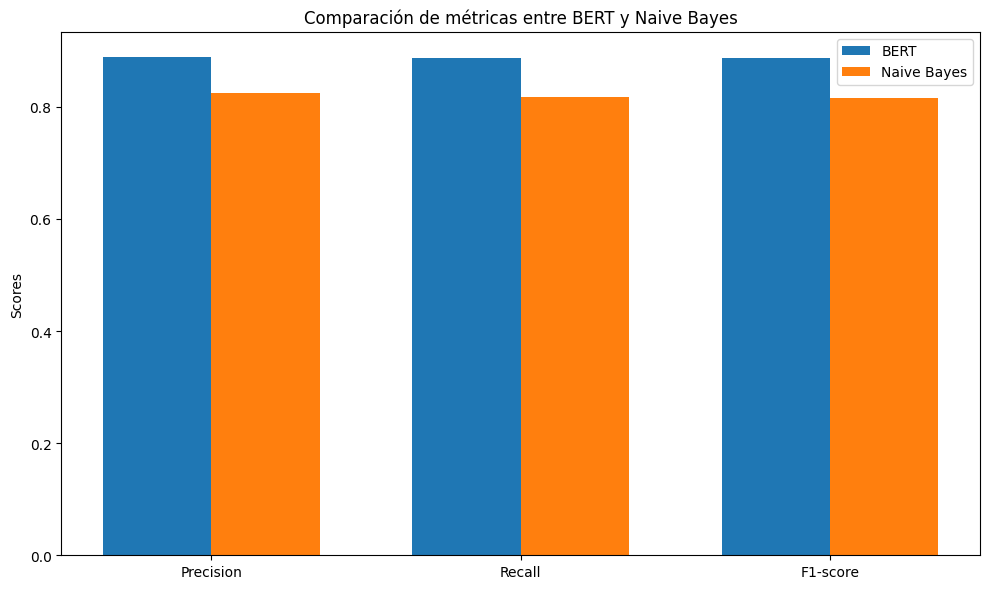

Reporte de clasificación BERT:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        82
           1       0.92      0.83      0.88        59
           2       0.87      0.93      0.90       100

    accuracy                           0.89       241
   macro avg       0.89      0.88      0.89       241
weighted avg       0.89      0.89      0.89       241


Reporte de clasificación Naive Bayes:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81        82
           1       0.78      0.78      0.78        59
           2       0.79      0.91      0.85       100

    accuracy                           0.82       241
   macro avg       0.82      0.81      0.81       241
weighted avg       0.82      0.82      0.82       241



In [25]:
plot_metrics(y_test, bert_preds, nb_predictions)
print_classification_reports(y_test, bert_preds, nb_predictions)

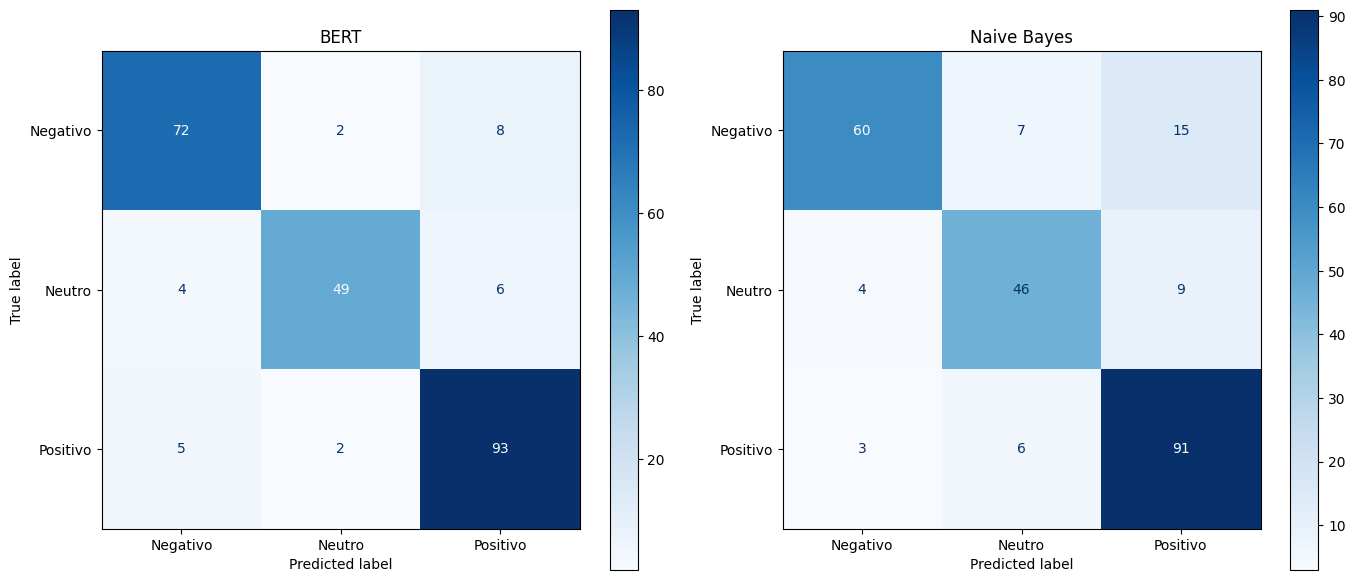

In [26]:

def plot_confusion_matrices(y_true, bert_preds, nb_preds):
    # Crear una figura con dos subplots para las matrices de confusión de BERT y Naive Bayes
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Calcular las matrices de confusión para BERT y Naive Bayes
    cm_bert = confusion_matrix(y_true, bert_preds)
    cm_nb = confusion_matrix(y_true, nb_preds)

    # Configurar las visualizaciones de matrices de confusión para BERT y Naive Bayes
    disp_bert = ConfusionMatrixDisplay(confusion_matrix=cm_bert, display_labels=label_encoder.classes_)
    disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=label_encoder.classes_)

    # Graficar las matrices de confusión para BERT y Naive Bayes en los subplots correspondientes
    disp_bert.plot(ax=axes[0], cmap='Blues', values_format='d')
    axes[0].set_title('BERT')  # Título del subplot para BERT

    disp_nb.plot(ax=axes[1], cmap='Blues', values_format='d')
    axes[1].set_title('Naive Bayes')  # Título del subplot para Naive Bayes

    # Ajustar el diseño y mostrar las matrices de confusión
    plt.tight_layout()
    plt.show()

# Visualizar las matrices de confusión
plot_confusion_matrices(y_test, bert_preds, nb_predictions)
